## Chapter3.2 Cloud Vision API

In [1]:
# Vision API クライアントライブラリをインポート
from google.cloud import vision

# クライアントのインスタンスを作成
vision_client = vision.Client()

In [2]:
# Imageクラスを作成、ローカルファイルを使う場合
image = vision_client.image(filename='seagull.jpg')

In [3]:
# Imageクラスを作成、GCSのパスを指定する場合
# image = vision_client.image(source_uri='gs://my-test-bucket/seagull.jpg')

In [4]:
# Imageクラスを作成、rawデータを使う場合

# ここでは画像ファイルからrawデータを読み込む
# with open('seagull.jpg', 'rb') as image_file:
#     image_array = image_file.read()

# image = vision_client.image(content=image_array)

#### ラベル検出
<img src='seagull.jpg' style='width:400px;margin-left:0px;'/>

In [5]:
# ラベル検出を実行
labels = image.detect_labels()

print('Labels:')
for label in labels:
    print('Score:%f, Label:%s' % (label.score, label.description))

Labels:
Score:0.979933, Label:bird
Score:0.944437, Label:water
Score:0.916829, Label:seabird
Score:0.877754, Label:beak
Score:0.874835, Label:fauna
Score:0.838202, Label:gull
Score:0.718291, Label:water bird
Score:0.717741, Label:charadriiformes
Score:0.650813, Label:european herring gull
Score:0.509801, Label:feather


#### 顔検知
<img src='face.jpg' style='width:400px;margin-left:0px;'/>

In [6]:
image = vision_client.image(filename='face.jpg')

# 顔検知を実行
faces = image.detect_faces(limit=20)

# 感情の推定結果をprint
for face in faces:
    print(face.joy)
    print(face.anger)
    print(face.sorrow)
    print(face.surprise)


Likelihood.VERY_LIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_LIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_LIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_LIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.POSSIBLE
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY
Likelihood.VERY_UNLIKELY


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

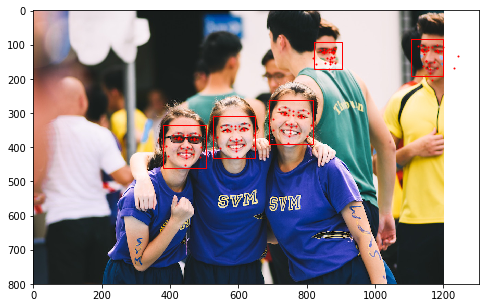

In [8]:
# 画像をmatplotlibで描画
plt.figure(figsize=(8, 6))
im = Image.open('face.jpg', 'r')
plt.imshow(np.asarray(im))

# 各顔検知結果ごとにプロット
for face in faces:
    # 顔の輪郭を矩形でプロット
    bbox_x = [v.x_coordinate for v in face.fd_bounds.vertices]
    bbox_y = [v.y_coordinate for v in face.fd_bounds.vertices]
    bbox_x.append(bbox_x[0])
    bbox_y.append(bbox_y[0])
    plt.plot(bbox_x, bbox_y, 'r-', linewidth=1)

    # 顔の各パーツ（目や耳）の位置をプロット
    lm = face.landmarks
    landmarks_x = []
    landmarks_y = []
    for landmark_name in vars(face.landmarks):
        landmark = getattr(face.landmarks, landmark_name)
        landmarks_x.append(landmark.position.x_coordinate)
        landmarks_y.append(landmark.position.y_coordinate)
    plt.plot(landmarks_x, landmarks_y, 'ro', markersize=1)

#### ランドマーク検出
<img src='sydney.jpg' style='width:400px;margin-left:0px;'/>

In [9]:
image = vision_client.image(filename='sydney.jpg')

# ランドマークを抽出
landmarks = image.detect_landmarks()

for landmark in landmarks:
    print(landmark.description)
    print(landmark.locations[0].latitude, landmark.locations[0].longitude)


Sydney
(-33.857765, 151.21450099999998)
Sydney Opera House
(-33.857123, 151.213921)


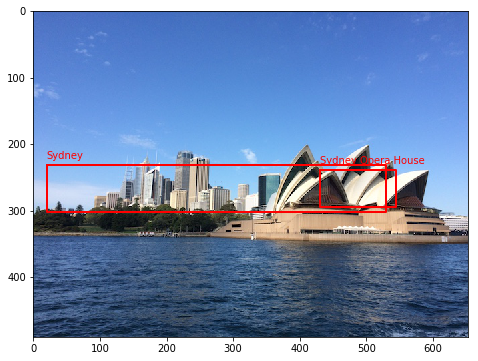

In [10]:
# 画像をロードしMatplotlibで描画する
im = Image.open('sydney.jpg', 'r')
plt.figure(figsize=(8, 6))
plt.imshow(np.asarray(im))

for landmark in landmarks:
    # 各ランドマークの矩形領域を取得する
    bbox_x = [v.x_coordinate for v in landmark.bounds.vertices]
    bbox_y = [v.y_coordinate for v in landmark.bounds.vertices]
    bbox_x.append(bbox_x[0])
    bbox_y.append(bbox_y[0])
    # 矩形をプロットする
    plt.plot(bbox_x, bbox_y, 'r-', linewidth=2)
    plt.text(bbox_x[0], bbox_y[0] - 10, landmark.description, color='r')

#### OCR
<img src='text.jpg' style='width:400px;margin-left:0px;'/>

In [11]:
image = vision_client.image(filename='text.jpg')

# OCRを実行
texts = image.detect_text()

# 読み取ったテキストをprint
for text in texts:
    print(text.description)
    

YCAT
横浜シティ·エア·ターミナル
(空港行きバス·高速バス)
Airport Bus-Expressway Bus /공항버스 고속버스
機場巴士·高速巴士/机场大巴,高速巴士

YCAT
横浜
シティ
·
エア
·
ターミナル
(
空港
行き
バス
·
高速
バス
)
Airport
Bus
-
Expressway
Bus
/
공항
버스
고속
버스
機場
巴士
·
高速
巴士
/
机场
大巴
,
高速
巴士


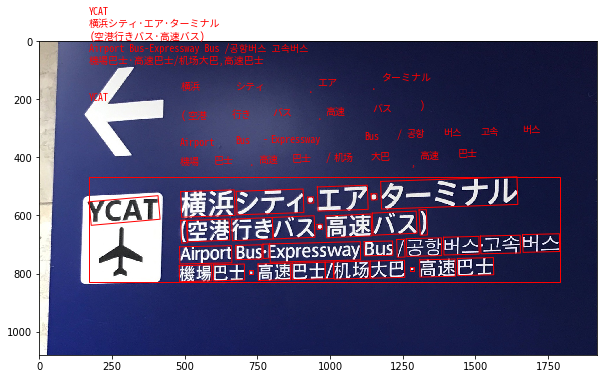

In [12]:
# 日本語フォントを読み込む
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'NotoSansMonoCJKjp-Regular.otf', size=10)

# 画像をロードしMatplotlibで描画する
im = Image.open('text.jpg', 'r')
plt.figure(figsize=(10, 6))
plt.imshow(np.asarray(im))

for text in texts:
    # 各テキストの矩形領域を取得する
    bbox_x = [v.x_coordinate for v in text.bounds.vertices]
    bbox_y = [v.y_coordinate for v in text.bounds.vertices]
    bbox_x.append(bbox_x[0])
    bbox_y.append(bbox_y[0])

    # 矩形をプロットする
    plt.plot(bbox_x, bbox_y, 'r-', linewidth=1)
    plt.text(bbox_x[0], bbox_y[0]-350, text.description,
             color='r', fontproperties=fp)